# Personal Information
Name: Martin Arnold

StudentID: 15202275

Email: [**15202275@uva.nl**](15202275@uva.nl)

Submitted on: **22.03.2024**

Github: https://github.com/usermar445/thesis

# Data Context
I will work with two standard data set in computer vision, i.e. 

- **MNIST** (*Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner. 1998. Gradient 
based learning applied to document recognition. Proc. IEEE 86, 11 (1998), 2278–2324*)
- **CIFAR10** (original source: *Alex Krizhevsky, Geoffrey Hinton, et al. 2009. Learning multiple layers of features from tiny images (2009)*)

Both are very well established as a standard in computer vision which increases the reproducability of my results.

Both come directly with the `torchvision` package from PyTorch from where I will load the data. 

The CIFAR10 dataset comprises 60,000 labeled 32x32 pixel color images, categorizing objects into 10 different classes such as airplanes, birds, or dogs.

MNIST is a collection of handwritten digits, consisting of 28x28 pixel grayscale images, with 60,000 training images and 10,000 test images.

# CIFAR10

## Load data (as tensors)

In [12]:
import torchvision
import torchvision.transforms as transforms

In [13]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)


In [14]:
trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=False, transform=transform
)

## Inspect example

In [24]:
example_index = 10  # Index of the example you want to extract
example_image, example_label = trainset[example_index]

In [16]:
example_image

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

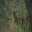

In [25]:
from PIL import Image
transform = transforms.ToPILImage()
img = transform(example_image)
img

In [21]:
example_label

6

Example per incides

In [22]:
images = []
for i in range(len(trainset)):
    image, _ = trainset[i]  # Get image and ignore label
    images.append(image)

In [27]:
labels = []
for i in range(len(trainset)):
    _, label = trainset[i]  # Get image and ignore label
    labels.append(label)

In [29]:
import numpy as np
y = np.array(labels)

In [52]:
class_labels = np.unique(y)
class_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
X = np.array([tens.numpy() for tens in images])

Shape of train data: 50'000 images, 32x32 pixels, with 3 different channels

In [42]:
X.shape

(50000, 3, 32, 32)

In [58]:
first_occurrence_indices = []

# Iterate over unique values
for value in class_labels:
    # Get indices of the first occurrence of the value
    indices = np.where(y == value)[0]
    first_occurrence_indices.append(indices[0])

In [59]:
first_occurrence_indices

[29, 4, 6, 9, 3, 27, 0, 7, 8, 1]

In [65]:
examples = X[first_occurrence_indices]

In [76]:
examples = [images[i] for i in first_occurrence_indices]

In [77]:
imgs = [transform(i) for i in examples]

In [82]:
import matplotlib.pyplot as plt

def show_images(images):
    fig = plt.figure(figsize=(25,10))
    n = 0
    for img in images:
        
        image = img.resize((300, 300))
        plt.subplot(2,5,n+1)
        n += 1
        plt.imshow(image)
    plt.show()
    
    return None

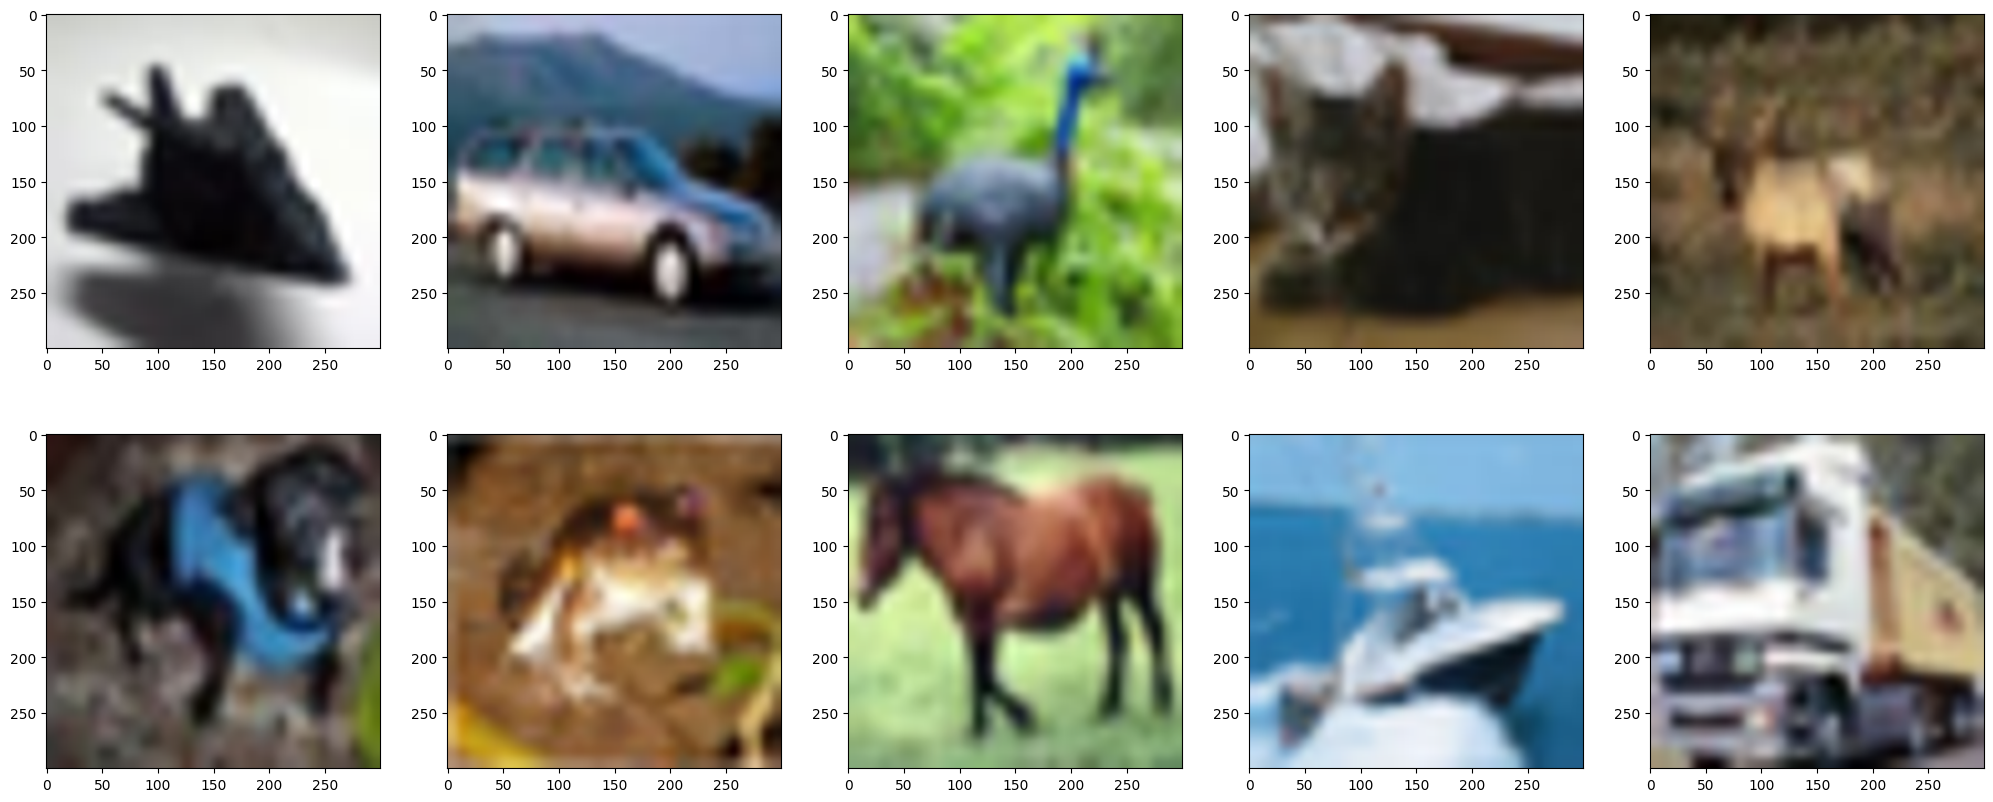

In [83]:
show_images(imgs)

## Inspecting the different channels

In [88]:
img_1 = [transform(i[0]) for i in examples]

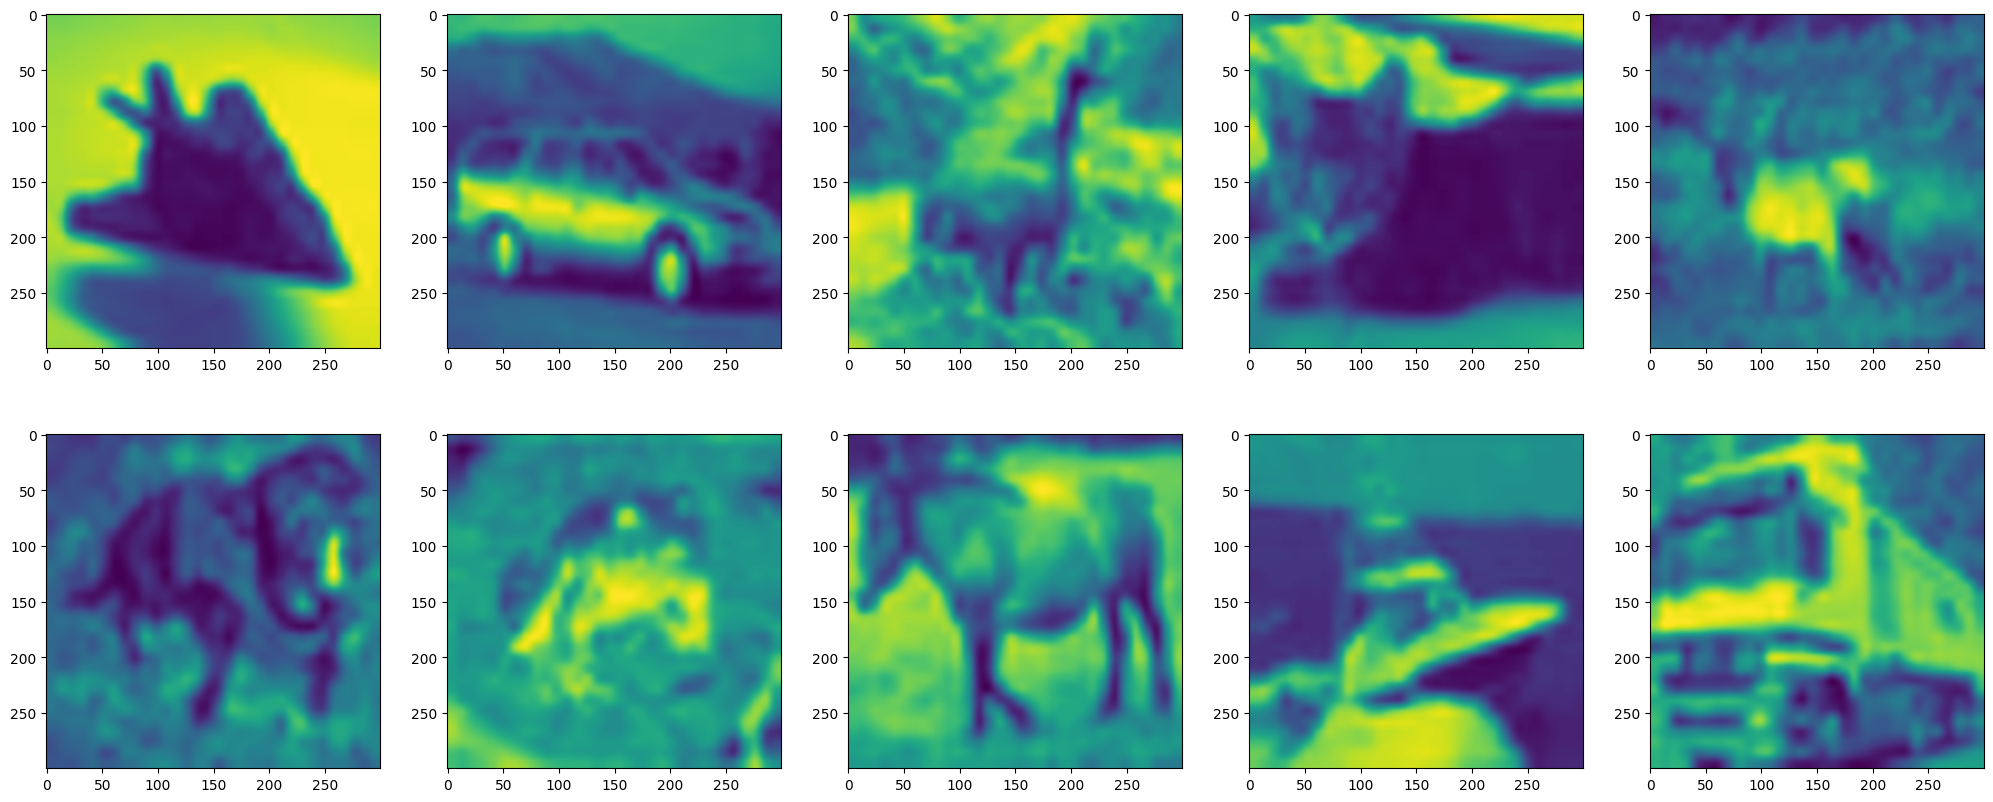

In [89]:
show_images(img_1)

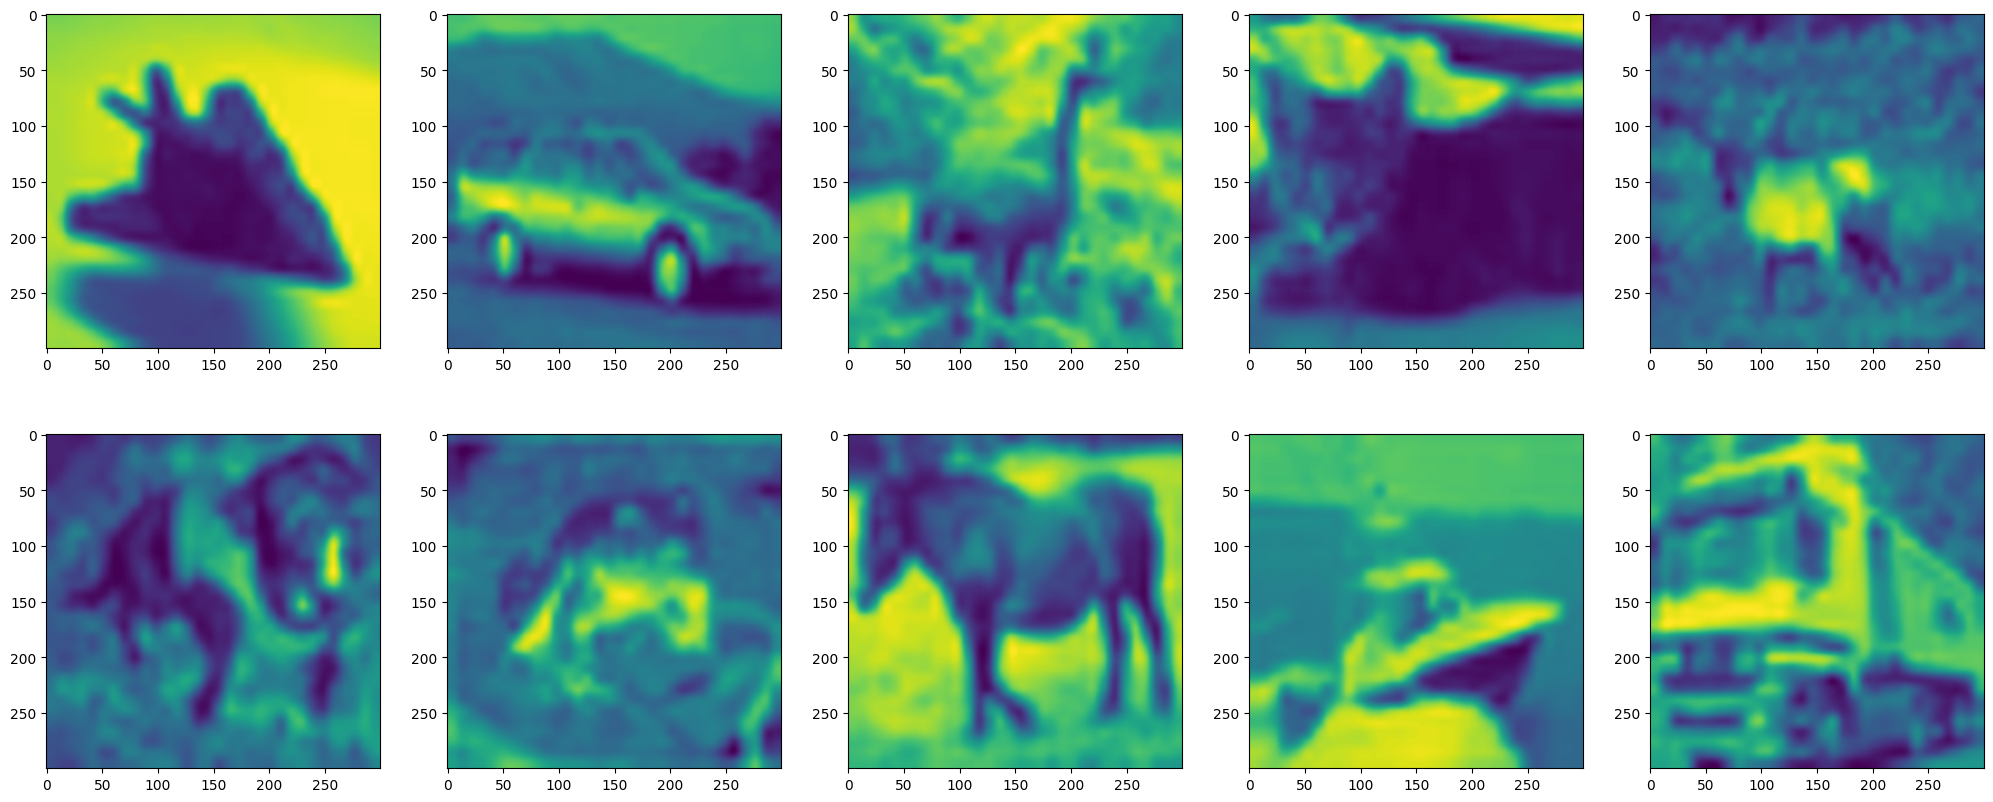

In [90]:
img_2= [transform(i[1]) for i in examples]
show_images(img_2)

In [ ]:
img_3 = [transform(i[2]) for i in examples]
show_images(img_3)

# MNIST

In [107]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)


In [108]:
trainset = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)

100%|██████████| 9912422/9912422 [00:01<00:00, 5710197.14it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 10771447.08it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 16135401.84it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18549687.21it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw


## Inspect example

In [111]:
example_index = 10  # Index of the example you want to extract
example_image, example_label = trainset[example_index]

In [112]:
example_image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [113]:
from PIL import Image
transform = transforms.ToPILImage()
img = transform(example_image)
img

In [114]:
example_label

3

Example per incides

In [115]:
images = []
for i in range(len(trainset)):
    image, _ = trainset[i]  # Get image and ignore label
    images.append(image)

In [116]:
labels = []
for i in range(len(trainset)):
    _, label = trainset[i]  # Get image and ignore label
    labels.append(label)

In [117]:
y = np.array(labels)

In [118]:
class_labels = np.unique(y)
class_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [119]:
X = np.array([tens.numpy() for tens in images])

Shape of train data: 60'000 images, 28x28 pixels, with 1 channel

In [121]:
X.shape

(60000, 1, 28, 28)

In [122]:
first_occurrence_indices = []

# Iterate over unique values
for value in class_labels:
    # Get indices of the first occurrence of the value
    indices = np.where(y == value)[0]
    first_occurrence_indices.append(indices[0])

In [123]:
first_occurrence_indices

[1, 3, 5, 7, 2, 0, 13, 15, 17, 4]

In [124]:
examples = X[first_occurrence_indices]

In [125]:
examples = [images[i] for i in first_occurrence_indices]

In [126]:
imgs = [transform(i) for i in examples]

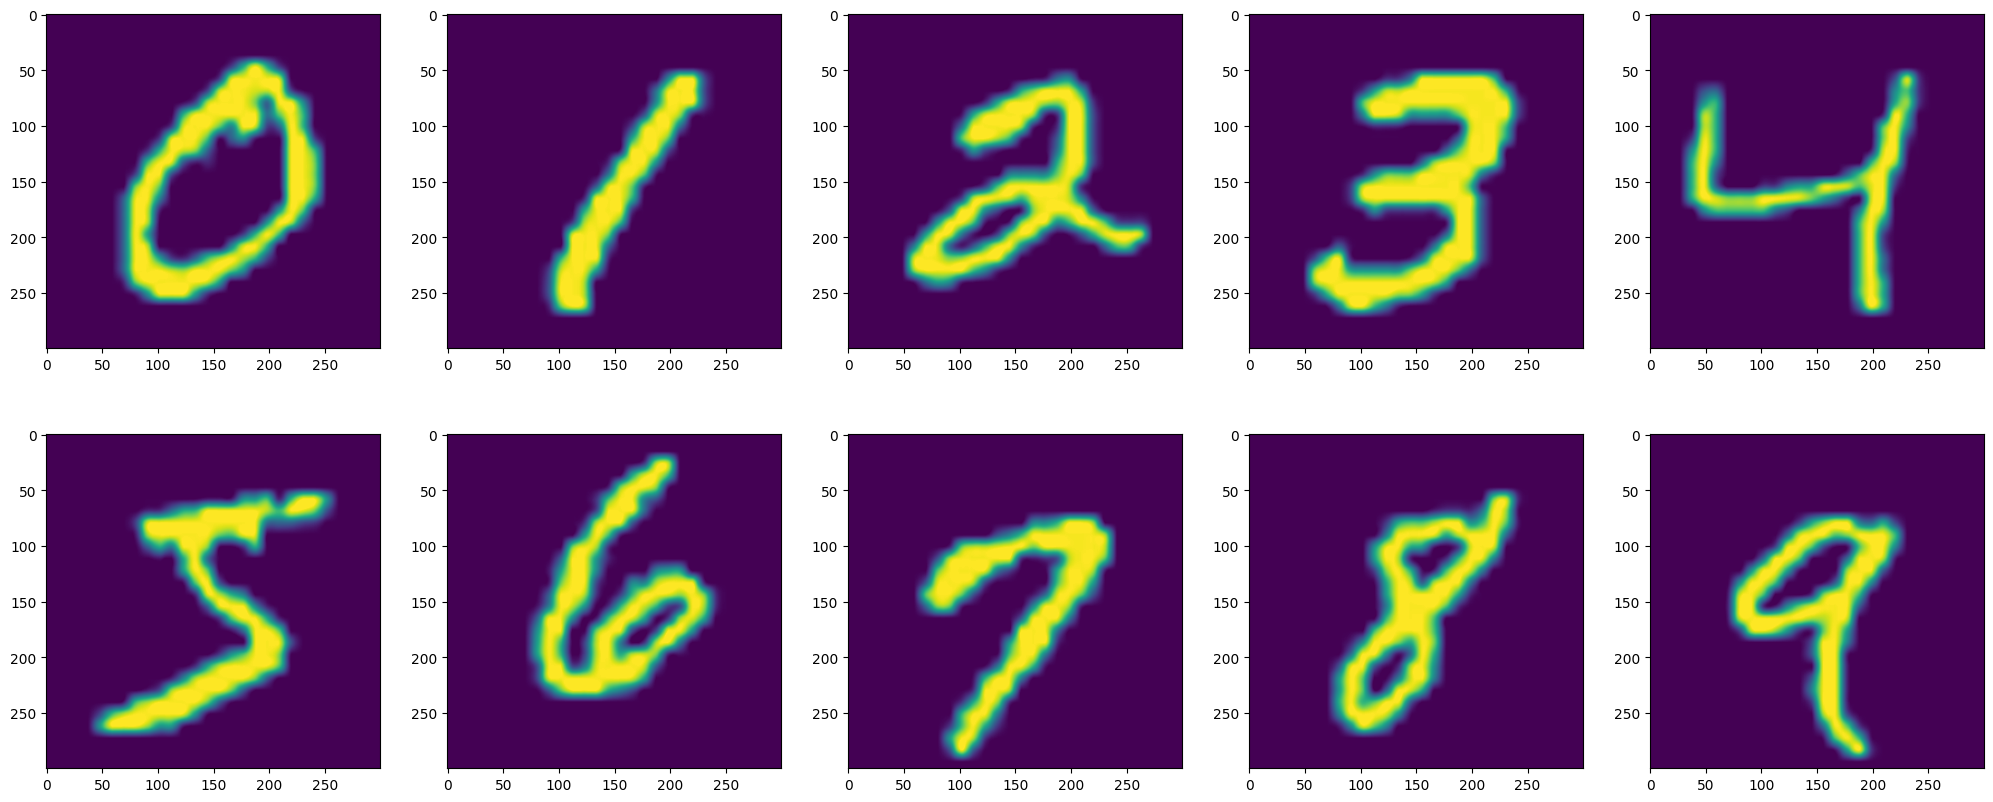

In [127]:
show_images(imgs)